In [182]:
import pandas as pd
import numpy as np

In [194]:
df_cork = pd.read_csv('C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/Swithins Day/Rainfall 15 July-24 August (Cork).csv')
df_dublin = pd.read_csv('C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/Swithins Day/Rainfall 15 July-24 August (Dublin).csv')
df_galway = pd.read_csv('C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/Swithins Day/Rainfall 15 July-24 August (Galway).csv')
df_donegal = pd.read_csv('C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/Swithins Day/Rainfall 15 July-24 August (Donegal).csv')

In [195]:
df_cork['Station'] = 'Cork'
df_dublin['Station'] = 'Dublin'
df_galway['Station'] = 'Galway'
df_donegal['Station'] = 'Donegal'

In [196]:
df = pd.concat([df_cork,df_dublin,df_galway,df_donegal])

In [197]:
df

,Day,2024,2023,2022,2021,2020,2019,2018,2017,2016,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,Station
0,St Swithins day,4.8,1.4,0.0,0.0,0.0,0.0,3.0,0.0,0.2,...,3.1,0.9,0.0,7.1,0.0,0.0,7.4,0.0,2.5,Cork
1,Jul.16,0.0,1.1,0.0,0.0,0.0,0.9,0.1,0.1,0.1,...,1.0,5.2,0.0,0.0,0.0,0.3,14.4,0.6,0.0,Cork
2,Jul.17,0.8,6.2,0.1,0.0,0.2,3.0,1.1,0.0,0.0,...,6.9,1.7,9.0,0.0,0.0,0.1,2.3,0.0,9.4,Cork
3,Jul.18,8.5,13.1,0.1,0.0,9.0,0.4,0.0,0.1,0.2,...,21.8,13.1,0.3,0.0,0.0,0.1,0.2,0.0,1.3,Cork
4,Jul.19,1.4,0.0,0.9,0.0,0.0,3.5,0.0,14.7,0.2,...,0.0,0.0,0.0,0.0,0.0,0.8,0.2,0.0,3.1,Cork
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Aug.20,13.2,1.5,0.5,3.6,6.9,0.6,0.3,0.0,0.5,...,0.0,11.4,0.0,0.5,10.6,2.4,17.7,0.1,5.7,Donegal
37,Aug.21,5.5,5.1,0.5,2.9,3.8,8.3,8.9,3.8,4.3,...,0.0,23.3,2.6,0.1,2.6,0.0,2.4,4.3,5.1,Donegal
38,Aug.22,8.4,0.4,0.0,0.0,4.2,2.9,5.4,43.1,2.0,...,3.0,12.7,0.0,1.4,0.2,0.8,0.1,0.4,4.4,Donegal
39,Aug.23,9.1,0.5,0.3,0.0,1.2,0.2,8.6,0.7,1.8,...,1.3,4.2,0.0,0.1,0.1,0.3,0.0,0.0,19.7,Donegal


Getting data into correct format


In [184]:
df.drop('Day',axis=1,inplace=True)

In [186]:
fair_on_swithins = df.iloc[0] < 1

In [187]:
df_without_swithins = df.iloc[1:]


In [188]:
num_fair_days = (df_without_swithins<1).sum()
num_rain_days = (df_without_swithins>=1).sum()

Visualisation

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
swithins = pd.DataFrame({
    'fair_on_swithins':fair_on_swithins,
    'num_fair_days':num_fair_days
})

In [191]:
means = swithins.groupby('fair_on_swithins')['num_fair_days'].mean()
print("Average number of fair days:")
print(means)


Average number of fair days:
fair_on_swithins
False    17.894737
True     18.380952
Name: num_fair_days, dtype: float64


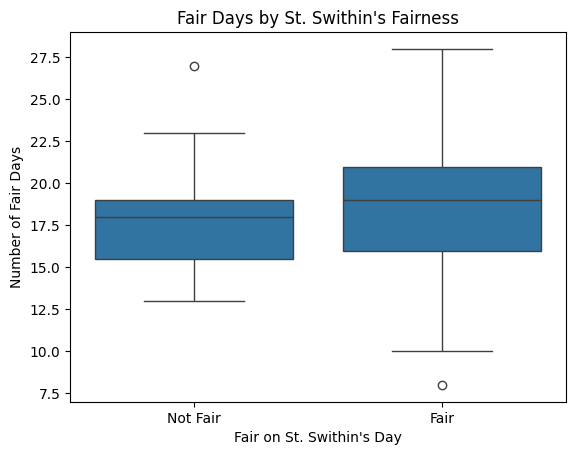

In [192]:
sns.boxplot(x='fair_on_swithins', y='num_fair_days', data=swithins)
plt.xticks([0, 1], ['Not Fair', 'Fair'])
plt.xlabel("Fair on St. Swithin's Day")
plt.ylabel("Number of Fair Days")
plt.title("Fair Days by St. Swithin's Fairness")
plt.show()


In [193]:
from scipy.stats import ttest_ind

group_fair = swithins[swithins['fair_on_swithins'] == 1]['num_fair_days']
group_not_fair = swithins[swithins['fair_on_swithins'] == 0]['num_fair_days']

stat, p = ttest_ind(group_fair, group_not_fair)
print(f"T-Test Statistic: {stat}, p-value: {p}")


T-Test Statistic: 0.3506632292951218, p-value: 0.7277775736824484
